In [116]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_csv('./employee.csv')
df = pd.DataFrame(data)
df.drop('COMMISSION_PCT', axis=1, inplace=True)

In [35]:
df.HIRE_DATE = pd.to_datetime(df.HIRE_DATE, format="mixed", errors="coerce")
df['YEAR_OF_EXPERIENCE'] = datetime.today().year - df.HIRE_DATE.dt.year

In [40]:
pre_df = df[['YEAR_OF_EXPERIENCE','SALARY']]

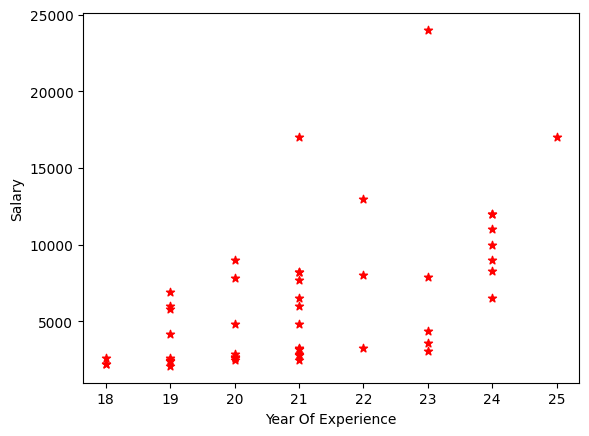

In [85]:
plt.xlabel("Year Of Experience")
plt.ylabel("Salary")
plt.scatter(pre_df.YEAR_OF_EXPERIENCE, pre_df.SALARY, color="red", marker="*")
plt.show()

In [168]:
X = pre_df.drop('SALARY',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,pre_df.SALARY,test_size=0.3)

In [169]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [170]:
y_test_pred = lin_reg.predict(x_test)

In [179]:
print(f"train score: {lin_reg.score(x_train,y_train)}")
print(f"test score: {lin_reg.score(x_test,y_test)}")
print(f"coef_: {lin_reg.coef_}")
print(f"intercept_: {lin_reg.intercept_}")
print(f"mean_squared_error test with prediction: {mean_squared_error(y_test, y_test_pred)}")

train score: 0.21223211107232298
test score: 0.4918387344561592
coef_: [1196.61363636]
intercept_: -19530.837662337668
mean_squared_error test with prediction: 10308139.56965831


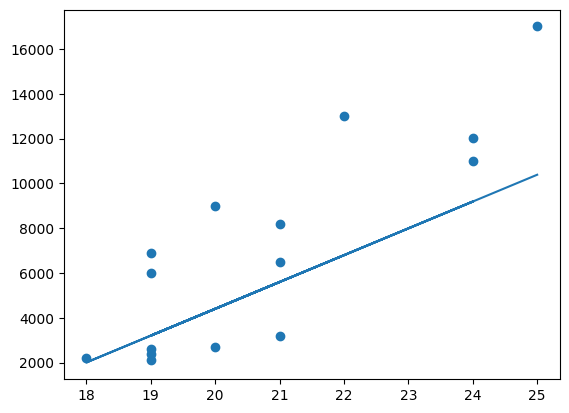

In [178]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred)
plt.show()